<a href="https://colab.research.google.com/github/shubham62025865/deeplearning/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow


A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a classification model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
    - "What class do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modelling for binary and mutliclass classification
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
      - Finding the best learning rate
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
  - Improving a model
- The power of non-linearity
- Evaluating classification models
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)

## Typical architecture of a classification neural network

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

We could start by importing a classification dataset but let's practice making some of our own classification data.

> 🔑 **Note:** It's a common practice to get you and model you build working on a toy (or simple) dataset before moving to your actual problem. Treat it as a rehersal experiment before the actual experiment(s).

Since classification is predicting whether something is one thing or another, let's make some data to reflect that.

To do so, we'll use Scikit-Learn's [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) function.



In [ ]:
from sklearn.datasets import make_circles
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os
import random
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  tf.random.set_seed(seed)
  # When running on the CuDNN backend, two further options must be set
  os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
  os.environ['TF_DETERMINISTIC_OPS'] = '1'
  # Set a fixed value for the hash seed
  os.environ["PYTHONHASHSEED"] = str(seed)
  print(f"Random seed set as {seed}")

In [ ]:
X, y = make_circles(n_samples=1000, shuffle=True, noise= 0.1, random_state=42)

In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

now we've created some data, let's look at the features (`X`) and labels (`y`).

In [ ]:
# Check out the features
X

array([[ 0.71210844,  0.28469831],
       [-0.67871584,  0.20727355],
       [-0.86602567,  0.34365139],
       ...,
       [-0.10655608, -0.86643656],
       [ 0.63726196, -0.85741166],
       [ 0.27181056,  0.97619727]])

In [ ]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
X = pd.DataFrame(data = X, columns = ["x1", "x2"])
y = pd.Series(data = y, name = "y")

In [ ]:
X.head()

,x1,x2
0,0.712108,0.284698
1,-0.678716,0.207274
2,-0.866026,0.343651
3,-0.517648,0.620599
4,0.454089,-0.890466


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: y, dtype: int64

In [ ]:
# df = pd.concat([X, y], axis = 1)

df = X.merge(y, how = "inner", left_index = True, right_index = True)
# df.join

In [ ]:
df.head()

,x1,x2,y
0,0.712108,0.284698,1
1,-0.678716,0.207274,1
2,-0.866026,0.343651,1
3,-0.517648,0.620599,1
4,0.454089,-0.890466,0


<Axes: xlabel='x1', ylabel='x2'>

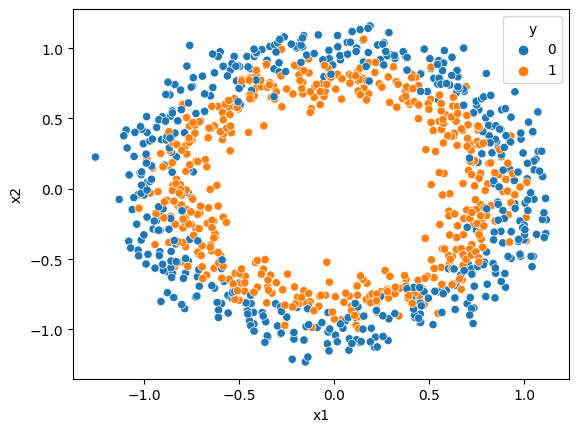

In [ ]:
sns.scatterplot(data = df, x ="x1", y = "x2", hue ="y")

Okay, we've seen some of our data and labels, how about we move towards visualizing?

> 🔑 **Note:** One important step of starting any kind of machine learning project is to [become one with the data](https://karpathy.github.io/2019/04/25/recipe/). And one of the best ways to do this is to visualize the data you're working with as much as possible. The data explorer's motto is "visualize, visualize, visualize".

We'll start with a DataFrame.

In [ ]:
X

,x1,x2
0,0.712108,0.284698
1,-0.678716,0.207274
2,-0.866026,0.343651
3,-0.517648,0.620599
4,0.454089,-0.890466
...,...,...
995,0.261683,0.879943
996,-1.002156,-0.327634
997,-0.106556,-0.866437
998,0.637262,-0.857412


In [ ]:
y

0      1
1      1
2      1
3      1
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: y, Length: 1000, dtype: int64

Alright, looks like we're dealing with a **binary classification** problem. It's binary because there are only two labels (0 or 1).

If there were more label options (e.g. 0, 1, 2, 3 or 4), it would be called **multiclass classification**.

Let's take our visualization a step further and plot our data.

In [ ]:
sns.scatterplot(data = circles, x = "X0", y = "X1", hue = "label")

NameError: ignored

Nice! From the plot, can you guess what kind of model we might want to build?

How about we try and build one to classify blue or red dots? As in, a model which is able to distinguish blue from red dots.

> Also try with tensorflow playground

## Input and output shapes

One of the most common issues you'll run into when building neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of the output data.

In our case, we want to input `X` and get our model to predict `y`.

So let's check out the shapes of `X` and `y`.

In [ ]:
df.head()

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

Hmm, where do these numbers come from?

In [ ]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

So we've got as many `X` values as we do `y` values, that makes sense.

Let's check out one example of each.

Alright, so we've got two `X` features which lead to one `y` value.

This means our neural network input shape will has to accept a tensor with at least one dimension being two and output a tensor with at least one value.

> 🤔 **Note:** `y` having a shape of (1000,) can seem confusing. However, this is because all `y` values are actually scalars (single values) and therefore don't have a dimension. For now, think of your output shape as being at least the same value as one example of `y` (in our case, the output from our neural network has to be at least one value).

## Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

In [ ]:
X.loc[0].shape

(2,)

In [ ]:
import os
import random
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  tf.random.set_seed(seed)
  # When running on the CuDNN backend, two further options must be set
  os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
  os.environ['TF_DETERMINISTIC_OPS'] = '1'
  # Set a fixed value for the hash seed
  os.environ["PYTHONHASHSEED"] = str(seed)
  print(f"Random seed set as {seed}")

In [ ]:
set_seed(3)

# model creation
model = tf.keras.Sequential([
    # input layer
    tf.keras.layers.InputLayer(input_shape = (2,)),
    # hidden layer
    tf.keras.layers.Dense(220, activation = "relu"),
    tf.keras.layers.Dense(220, activation = "relu"),
    tf.keras.layers.Dense(220, activation = "relu"),
    tf.keras.layers.Dense(220, activation = "relu"),
    tf.keras.layers.Dense(220, activation = "relu"),
    tf.keras.layers.Dense(120, activation = "relu"),
    tf.keras.layers.Dense(120, activation = "relu"),
    tf.keras.layers.Dense(120, activation = "relu"),
    tf.keras.layers.Dense(15, activation = "relu"),
    tf.keras.layers.Dense(15, activation = "relu"),
    # output layer
    tf.keras.layers.Dense(1, activation = "sigmoid"), # "softmax" for multiclass

])

# model.compile

model.compile(
    loss = 'binary_crossentropy',
    optimizer = "adam",
    metrics = ["accuracy"]
)

# model.fit

history = model.fit(X, y, epochs = 200, validation_split= 0.2)


Random seed set as 3
Epoch 1/200
25/25 [==============================] - 3s 23ms/step - loss: 0.6921 - accuracy: 0.5425 - val_loss: 0.6886 - val_accuracy: 0.5100
Epoch 2/200
25/25 [==============================] - 0s 10ms/step - loss: 0.6780 - accuracy: 0.6000 - val_loss: 0.6525 - val_accuracy: 0.5850
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6594 - accuracy: 0.6363 - val_loss: 0.6482 - val_accuracy: 0.5800
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.5771 - accuracy: 0.6762 - val_loss: 0.4564 - val_accuracy: 0.7800
Epoch 5/200
25/25 [==============================] - 0s 9ms/step - loss: 0.4770 - accuracy: 0.7862 - val_loss: 0.4063 - val_accuracy: 0.8100
Epoch 6/200
25/25 [==============================] - 0s 9ms/step - loss: 0.4313 - accuracy: 0.8112 - val_loss: 0.3935 - val_accuracy: 0.8550
Epoch 7/200
25/25 [==============================] - 0s 9ms/step - loss: 0.4216 - accuracy: 0.8012 - val_loss: 0.3930 - val_accurac

In [ ]:
df_result = pd.DataFrame(history.history)

In [ ]:
df_result.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

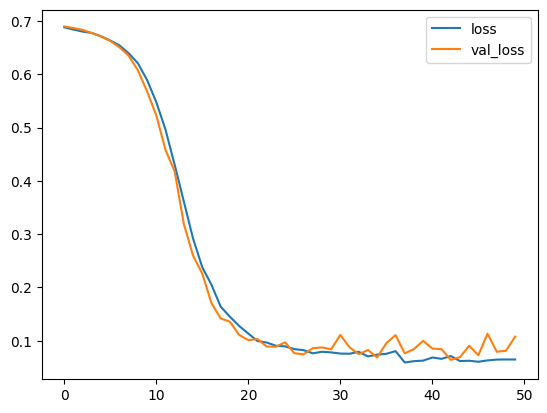

In [ ]:
plt.plot(df_result[["loss", "val_loss"]], label = ["loss", "val_loss"])
plt.legend()

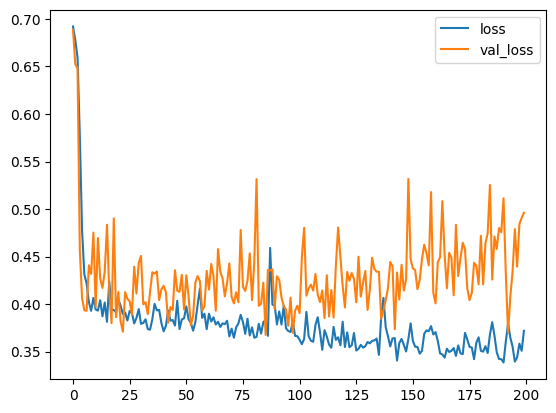

In [ ]:
plt.plot(df_result[["loss", "val_loss"]], label = ["loss", "val_loss"])
plt.legend()

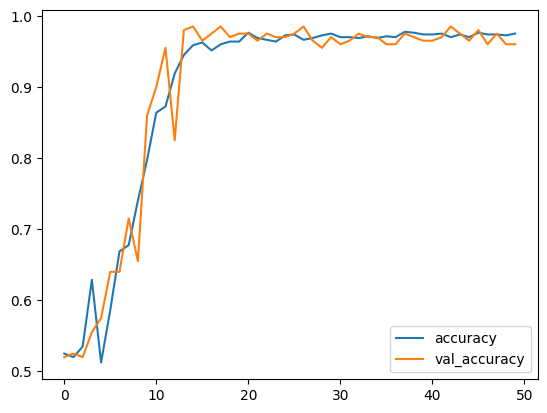

In [ ]:
plt.plot(df_result[["accuracy", "val_accuracy"]], label = ["accuracy", "val_accuracy"])
plt.legend()

In [ ]:
# model

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = [2]),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#model compile

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = "adam",
              metrics = ["accuracy"]
              )

history = model.fit(X, y, epochs = 100, validation_split = 0.2, verbose = 0)

In [ ]:
history_df = pd.DataFrame(history.history)

In [ ]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.737751,0.47500,0.720766,0.455
1,0.712157,0.47625,0.706598,0.455
2,0.702637,0.45875,0.702242,0.405
3,0.698791,0.42875,0.700831,0.460
4,0.696624,0.49000,0.698421,0.505


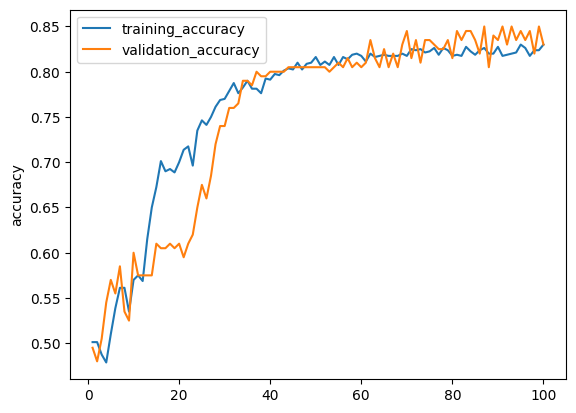

In [ ]:
sns.lineplot(data = history_df,x = history_df.index+1, y = "accuracy", label = "training_accuracy")
sns.lineplot(data = history_df,x = history_df.index+1, y = "val_accuracy", label = "validation_accuracy")
plt.show()

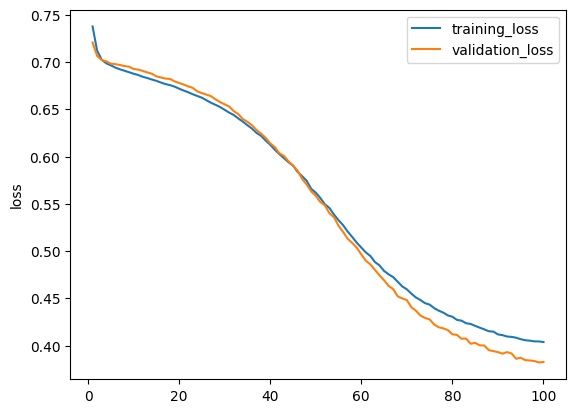

In [ ]:
sns.lineplot(data = history_df,x = history_df.index+1, y = "loss", label = "training_loss")
sns.lineplot(data = history_df,x = history_df.index+1, y = "val_loss", label = "validation_loss")
plt.show()

In [ ]:
def surface_area(radius, height):
  area = 3.14 * radius**2 * height
  return area


surface_area(2,3)

37.68

In [ ]:
surface_area(3,2)

56.52

In [ ]:
surface_area(height = 3, 2)

SyntaxError: ignored

In [ ]:
surface_area(2, height = 3)

37.68

In [ ]:
surface_area(height = 3, radius = 2)

37.68

In [ ]:
surface_area(radius = 2,height = 3)

37.68

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.692109,0.54250,0.688580,0.510
1,0.678007,0.60000,0.652475,0.585
2,0.659354,0.63625,0.648204,0.580
3,0.577061,0.67625,0.456448,0.780
4,0.477049,0.78625,0.406341,0.810
...,...,...,...,...
195,0.339469,0.84625,0.478945,0.830
196,0.344031,0.84625,0.439370,0.825
197,0.358363,0.82000,0.484184,0.830
198,0.350829,0.83750,0.490648,0.840


In [ ]:
def plot_curve(history):
  history_df = pd.DataFrame(history.history)

  fig, ax = plt.subplots(1,2, figsize = (10,4))

  sns.lineplot(data = history_df,x = history_df.index+1, y = "loss", label = "training_loss", ax = ax[0])
  sns.lineplot(data = history_df,x = history_df.index+1, y = "val_loss", label = "validation_loss",ax = ax[0])


  sns.lineplot(data = history_df,x = history_df.index+1, y = "accuracy", label = "training_accuracy", ax = ax[1])
  sns.lineplot(data = history_df,x = history_df.index+1, y = "val_accuracy", label = "validation_accuracy", ax = ax[1])

  fig.suptitle("loss & accuracy curve plot")
  plt.tight_layout()
  plt.show()



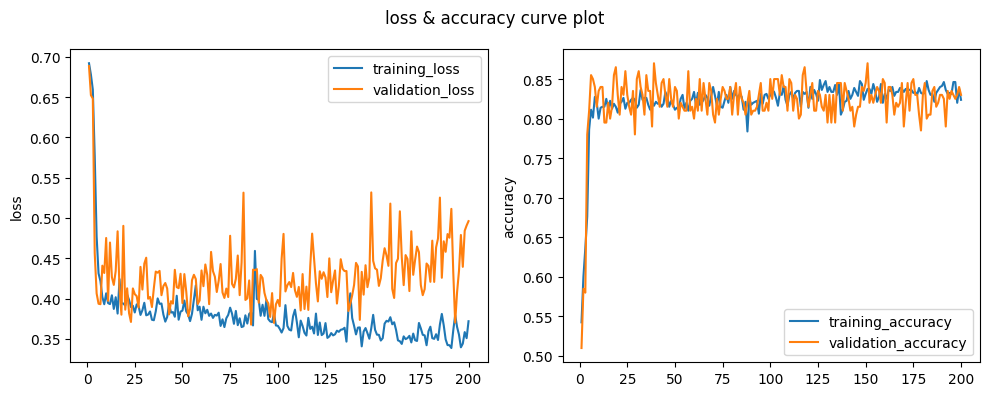

In [ ]:
plot_curve(history)

In [ ]:
# random seed
tf.random.set_seed(42)

# model define
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[2]),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid") # output layer

])

# model.compile

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# model fit

model_1.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5070
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5290
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5360
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5340
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.5400
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.5560
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.5630
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.5780
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.5630
Epoch 11/

In [ ]:
[1.2]

In [ ]:
X[0]

array([0.75424625, 0.23148074])

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 949us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 990us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 963us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 927us/step - loss: 0.6942 - accuracy: 0.4820


Looking at the accuracy metric, our model performs poorly (50% accuracy on a binary classification problem is the equivalent of guessing), but what if we trained it for longer?

In [ ]:
y.value_counts()

1    500
0    500
Name: y, dtype: int64

In [ ]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 897us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

Still not even as good as guessing (~50% accuracy)... hmm...?

Let's remind ourselves of a couple more ways we can use to improve our models.

## Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose a different optimization function (such as the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

*There are many different ways to potentially improve a neural network. Some of the most common include:

- increasing the number of layers (making the network deeper)
- increasing the number of hidden units (making the network wider)
- changing the learning rate.

Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

Surely doing this will result in predictions better than guessing...



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.5418 - accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5330
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4570
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5120
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5220
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4910
Epoch 11/

Still!

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

> 🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function `plot_decision_boundary()` which:
* Takes in a trained model, features (`X`) and labels (`y`).
* Creates a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

If this sounds confusing, let's see it in code and then see the output.

> 🔑 **Note:** If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Now we've got a function to plot our model's decision boundary (the cut off point its making between red and blue dots), let's try it out.

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


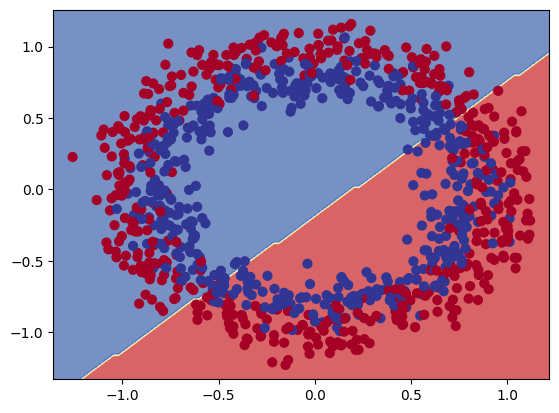

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, np.array(X), np.array(y))

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


Loss is not correct "BinaryCrossentropy()"

No trouble, we can recreate it for a regression problem.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

Okay, it seems like our model is learning something (the `mae` value trends down with each epoch), let's plot its predictions.

2/2 [==============================] - 0s 5ms/step


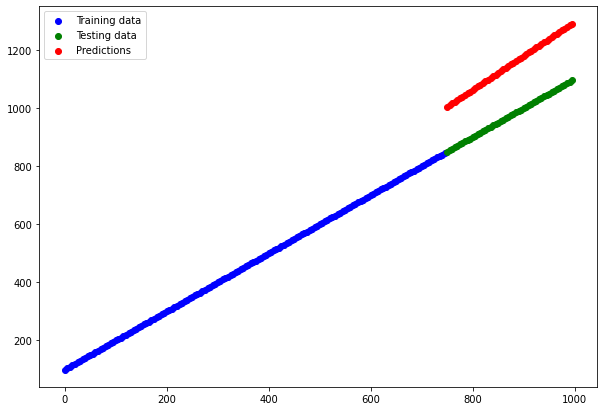

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

## The missing piece: Non-linearity

Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and clue circles), we're going to need some non-linear lines.

> 🔨 **Practice:** Before we get to the next steps, I'd encourage you to play around with the [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true) (check out what the data has in common with our own classification data) for 10-minutes. In particular the tab which says "activation". Once you're done, come back.

Did you try out the activation options? If so, what did you find?

If you didn't, don't worry, let's see it in code.

We're going to replicate the neural network you can see at this link: [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 968us/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 978us/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3802 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2270 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 2.8318 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 2.5699 - accuracy: 0.5000
Epoch

Okay, our model performs a little worse than guessing.

Let's remind ourselves what our data looks like.

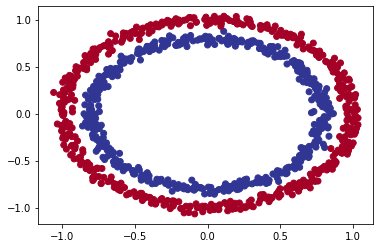

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

And let's see how our model is making predictions on it.

313/313 [==============================] - 0s 790us/step
doing binary classifcation...


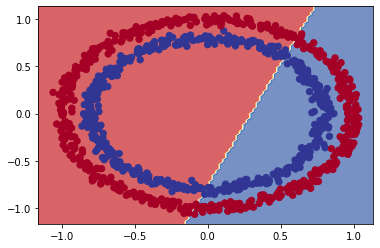

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the `activation` parameter in on of our layers.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/

Hmm... still not learning...

What we if increased the number of neurons and layers?

Say, 2 hidden layers, with [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu), pronounced "rel-u", (short for [rectified linear unit](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)), activation on the first one, and 4 neurons each?

To see this network in action, check out the [TensorFlow Playground demo](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true&dataset_hide=true).


*The neural network we're going to recreate with TensorFlow code. See it live at [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true&dataset_hide=true).*

Let's try.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/100
32/32 [=

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 893us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

We're still hitting 50% accuracy, our model is still practically as good as guessing.

How do the predictions look?

313/313 [==============================] - 0s 730us/step
doing binary classifcation...


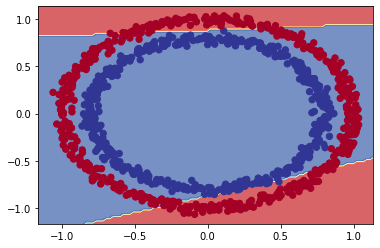

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

What gives?

It seems like our model is the same as the one in the [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true) but model it's still drawing straight lines...

Ideally, the yellow lines go on the inside of the red circle and the blue circle.

Okay, okay, let's model this circle once and for all.


This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the [Sigmoid activation function](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.8020


[0.477693110704422, 0.8019999861717224]

It looks like our model is getting some incredible results, let's check them out.

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


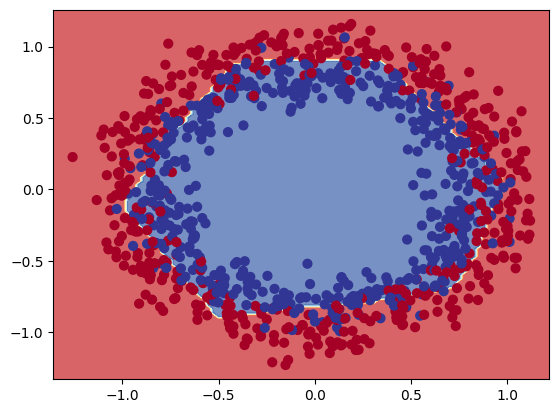

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

> 🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

> 🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)
# A = tf.cast(tf.range(-10, 10), tf.float32)
A = tf.constant(np.arange(-10, 10))
A

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])>

How does this look?



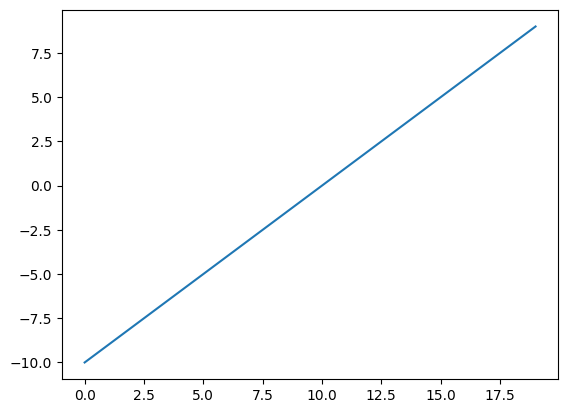

In [ ]:
# Visualize our toy tensor
plt.plot(A)

A straight (linear) line!

Nice, now let's recreate the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) and see what it does to our data. You can also find a pre-built sigmoid function at [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid).

In [ ]:
def sigmoid(x):
  result = 1 / (1 + np.exp(-x))
  # return np.where(result>=0.5, 1, 0)
  return result

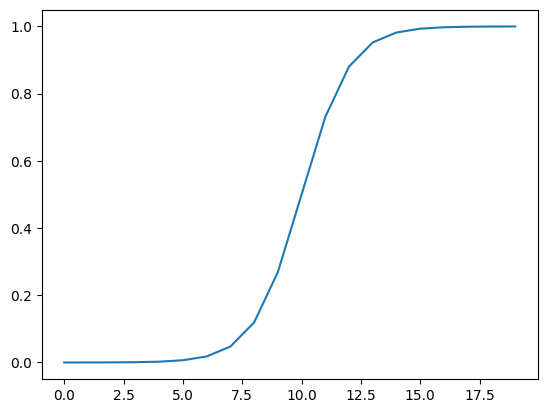

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

And how does it look?

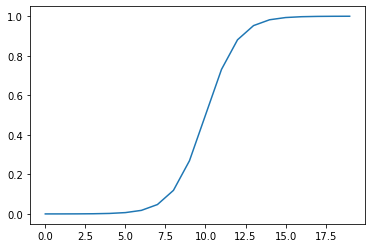

In [ ]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A))

A non-straight (non-linear) line!

Okay, how about the [ReLU function](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/#:~:text=The%20rectified%20linear%20activation%20function,otherwise%2C%20it%20will%20output%20zero.) (ReLU turns all negatives to 0 and positive numbers stay the same)?

In [ ]:
A = tf.constant(np.arange(-10, 10))
A

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])>

In [ ]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

How does the ReLU-modified tensor look?

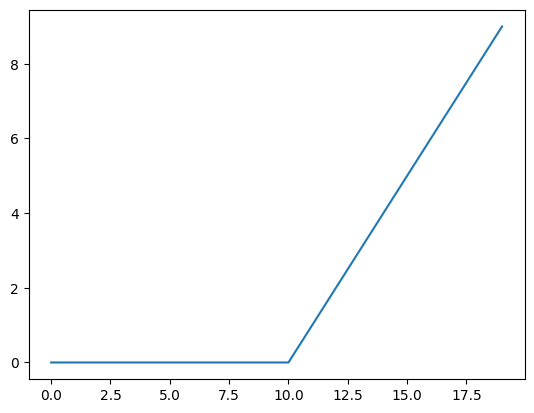

In [ ]:
plt.plot(relu(A))

In [ ]:
relu(-3)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [ ]:
b = np.array([-3,5,-1.3,5,6,1,-10])
b

array([ -3. ,   5. ,  -1.3,   5. ,   6. ,   1. , -10. ])

In [ ]:
relu(b)

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 5, 0, 5, 6, 1, 0], dtype=int32)>

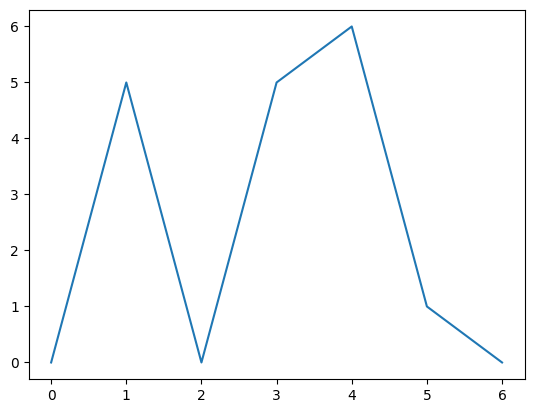

In [ ]:
plt.plot(relu(b))

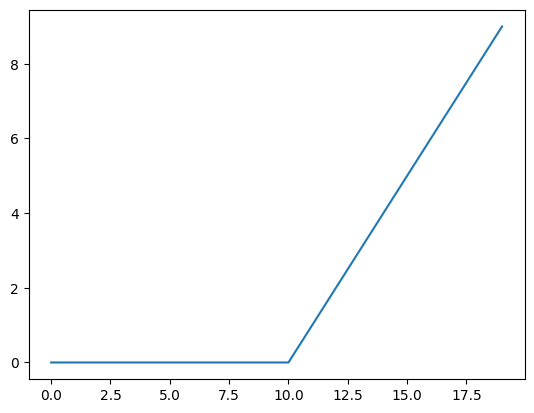

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

Another non-straight line!

Well, how about TensorFlow's [linear activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear)?

In [ ]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])>

Hmm, it looks like our inputs are unmodified...

In [ ]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.


> 📖  **Resource:** For more on activation functions, check out the [machine learning cheatsheet page](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#) on them.

## tanh

In [ ]:
def tanh(x):
  result = (np.exp(x) - np.exp(-x))/ (np.exp(x) + np.exp(-x))
  return result

tanh(A)

array([-1.        , -0.99999997, -0.99999977, -0.99999834, -0.99998771,
       -0.9999092 , -0.9993293 , -0.99505475, -0.96402758, -0.76159416,
        0.        ,  0.76159416,  0.96402758,  0.99505475,  0.9993293 ,
        0.9999092 ,  0.99998771,  0.99999834,  0.99999977,  0.99999997])

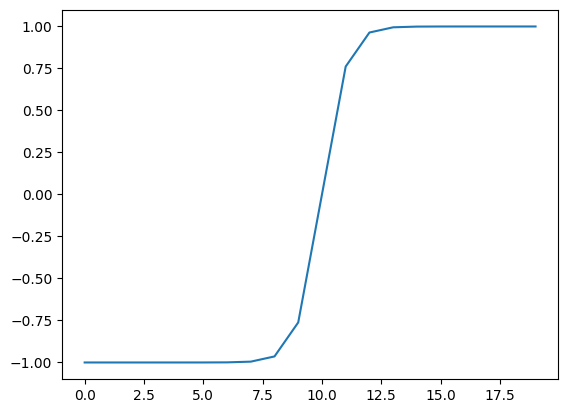

In [ ]:
plt.plot(tanh(A))

## Evaluating and improving our classification model

If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [ ]:
X, y = make_circles(n_samples = 1000, noise = 0.1, shuffle = True, random_state = 24)

In [ ]:
# How many examples are in the whole dataset?
len(X)

1000

In [ ]:
15/85

0.17647058823529413

In [ ]:
# Split data into train, validation and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 3)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1764, random_state = 3)

print(f"shape of X_train : {X_train.shape}")
print(f"shape of X_test : {X_test.shape}")
print(f"shape of X_valid : {X_valid.shape}")
print(f"shape of y_train : {y_train.shape}")
print(f"shape of y_test : {y_test.shape}")
print(f"shape of y_valid : {y_valid.shape}")

# Check the shapes of the data
# X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

shape of X_train : (700, 2)
shape of X_test : (150, 2)
shape of X_valid : (150, 2)
shape of y_train : (700,)
shape of y_test : (150,)
shape of y_valid : (150,)


Great, now we've got training and test sets, let's model the training data and evaluate what our model has learned on the test set.

In [ ]:
from tensorflow.keras.layers import InputLayer, Dense

In [ ]:
set_seed(3)

model_new = tf.keras.models.Sequential([

  InputLayer(input_shape = (2,)),
  Dense(50, activation = "relu"),
  Dense(50, activation = "relu"),
  Dense(30, activation = "relu"),
  Dense(1, activation = "sigmoid")

])

model_new.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]

)


history = model_new. fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 50)

Random seed set as 3
Epoch 1/50
22/22 [==============================] - 2s 12ms/step - loss: 0.6937 - accuracy: 0.4957 - val_loss: 0.6872 - val_accuracy: 0.4933
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.4914 - val_loss: 0.6842 - val_accuracy: 0.4800
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5471 - val_loss: 0.6784 - val_accuracy: 0.5733
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5386 - val_loss: 0.6703 - val_accuracy: 0.5933
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.5471 - val_loss: 0.6632 - val_accuracy: 0.6800
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6625 - accuracy: 0.7314 - val_loss: 0.6494 - val_accuracy: 0.6867
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.6329 - val_loss: 0.6346 - val_accuracy: 0.826

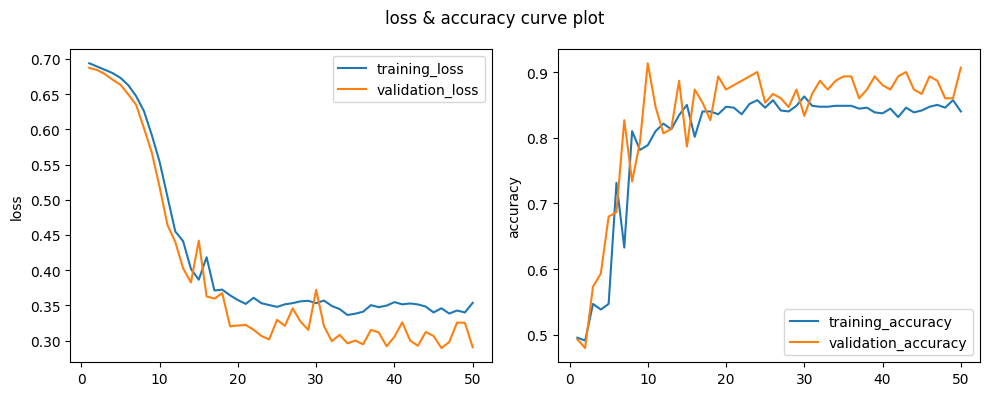

In [ ]:
plot_curve(history)

In [ ]:
print(f"for train set {model_new.evaluate(X_train, y_train)}")
print(f"for validation set {model_new.evaluate(X_valid, y_valid)}")
print(f"for test set {model_new.evaluate(X_test, y_test)}")

22/22 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8586
for train set [0.3331191837787628, 0.8585714101791382]
5/5 [==============================] - 0s 3ms/step - loss: 0.2907 - accuracy: 0.9067
for validation set [0.2906648814678192, 0.9066666960716248]
5/5 [==============================] - 0s 5ms/step - loss: 0.3378 - accuracy: 0.8467
for test set [0.33779382705688477, 0.846666693687439]


In [ ]:
model_new.predict(X_test)[:5]

5/5 [==============================] - 0s 5ms/step


array([[0.76249236],
       [0.8199313 ],
       [0.05724469],
       [0.0056865 ],
       [0.7623023 ]], dtype=float32)

In [ ]:
y_test[:5]

array([0, 1, 0, 0, 1])

In [ ]:
# Set random seed
set_seed(3)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape = [2]),
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=100, verbose = 2)

Random seed set as 3
Epoch 1/100
22/22 - 2s - loss: 0.7044 - accuracy: 0.4871 - 2s/epoch - 71ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7007 - accuracy: 0.4957 - 66ms/epoch - 3ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6981 - accuracy: 0.4929 - 68ms/epoch - 3ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6960 - accuracy: 0.5000 - 58ms/epoch - 3ms/step
Epoch 5/100
22/22 - 0s - loss: 0.6944 - accuracy: 0.5029 - 67ms/epoch - 3ms/step
Epoch 6/100
22/22 - 0s - loss: 0.6931 - accuracy: 0.5086 - 65ms/epoch - 3ms/step
Epoch 7/100
22/22 - 0s - loss: 0.6920 - accuracy: 0.5071 - 50ms/epoch - 2ms/step
Epoch 8/100
22/22 - 0s - loss: 0.6912 - accuracy: 0.5071 - 51ms/epoch - 2ms/step
Epoch 9/100
22/22 - 0s - loss: 0.6905 - accuracy: 0.5071 - 83ms/epoch - 4ms/step
Epoch 10/100
22/22 - 0s - loss: 0.6898 - accuracy: 0.5200 - 54ms/epoch - 2ms/step
Epoch 11/100
22/22 - 0s - loss: 0.6892 - accuracy: 0.5229 - 59ms/epoch - 3ms/step
Epoch 12/100
22/22 - 0s - loss: 0.6887 - accuracy: 0.5286 - 57ms/epoch - 3ms/step
Epoch

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

5/5 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.7267
Model loss on the test set: 0.5779747366905212
Model accuracy on the test set: 72.67%


In [ ]:
# Set random seed
set_seed(3)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape = [2]),
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=100, verbose = 2)

Random seed set as 3
Epoch 1/100
22/22 - 1s - loss: 0.6944 - accuracy: 0.5071 - 773ms/epoch - 35ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6875 - accuracy: 0.5514 - 35ms/epoch - 2ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6841 - accuracy: 0.5471 - 34ms/epoch - 2ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6812 - accuracy: 0.5429 - 35ms/epoch - 2ms/step
Epoch 5/100
22/22 - 0s - loss: 0.6783 - accuracy: 0.5457 - 35ms/epoch - 2ms/step
Epoch 6/100
22/22 - 0s - loss: 0.6711 - accuracy: 0.5843 - 37ms/epoch - 2ms/step
Epoch 7/100
22/22 - 0s - loss: 0.6610 - accuracy: 0.5971 - 35ms/epoch - 2ms/step
Epoch 8/100
22/22 - 0s - loss: 0.6497 - accuracy: 0.6314 - 36ms/epoch - 2ms/step
Epoch 9/100
22/22 - 0s - loss: 0.6329 - accuracy: 0.6586 - 35ms/epoch - 2ms/step
Epoch 10/100
22/22 - 0s - loss: 0.6185 - accuracy: 0.6486 - 34ms/epoch - 2ms/step
Epoch 11/100
22/22 - 0s - loss: 0.5902 - accuracy: 0.6971 - 36ms/epoch - 2ms/step
Epoch 12/100
22/22 - 0s - loss: 0.5545 - accuracy: 0.7643 - 35ms/epoch - 2ms/step
Ep

100% accuracy? Nice!

Now, when we started to create `model_8` we said it was going to be the same as `model_7` but you might've found that to be a little lie.

That's because we changed a few things:
* **The `activation` parameter** - We used strings (`"relu"` & `"sigmoid"`) instead of using library paths (`tf.keras.activations.relu`), in TensorFlow, they both offer the same functionality.
* **The `learning_rate` (also `learning_rate `) parameter** - We increased the **learning rate** parameter in the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) to `0.01` instead of `0.001` (an increase of 10x).
  * You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a *too high* learning rate, where a model tries to learn too fast and doesn't learn anything. We'll see a trick to find the ideal learning rate soon.
* **The number of epochs** - We lowered the number of epochs (using the `epochs` parameter) from 100 to 25 but our model still got an incredible result on both the training and test sets.
  * One of the reasons our model performed well in even less epochs (remember a single epoch is the model trying to learn patterns in the data by looking at it once, so 25 epochs means the model gets 25 chances) than before is because we increased the learning rate.

We know our model is performing well based on the evaluation metrics but let's see how it performs visually.


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


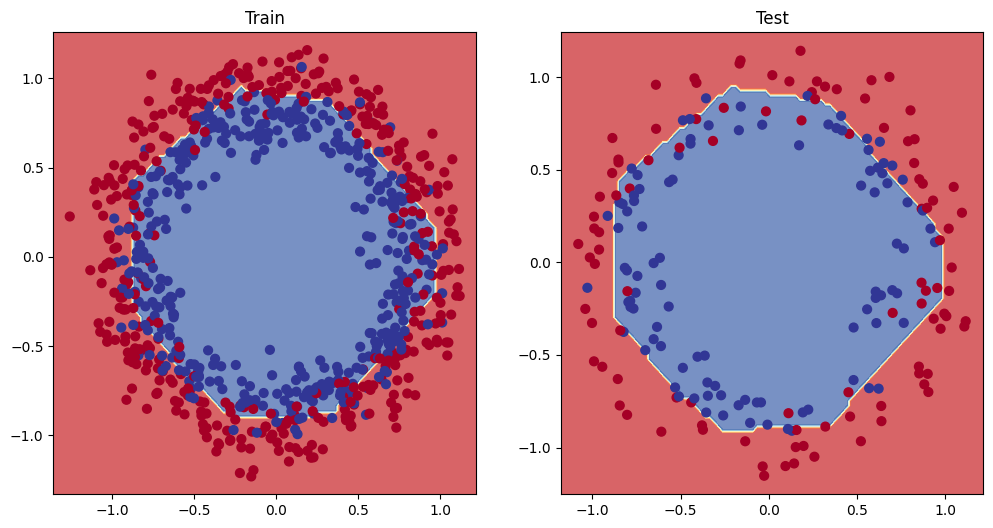

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

Check that out! How cool. With a few tweaks, our model is now predicting the blue and red circles almost perfectly.

### Plot the loss curves

Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the **loss curves** (also referred to as the **learning curves**).

You might've seen we've been using the variable `history` when calling the `fit()` function on a model ([`fit()` returns a `History` object](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it.

In [ ]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Inspecting the outputs, we can see the loss values going down and the accuracy going up.

How's it look (visualize, visualize, visualize)?

Text(0.5, 1.0, 'Model_8 training curves')

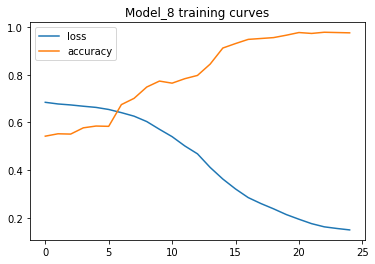

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

> 🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

In `model_8` you saw we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "can we do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [ ]:
1e-4

0.0001

In [ ]:
1e-4 * 10**(4/20)

0.00015848931924611136

In [ ]:
lr = []
for epoch in range(0,50):
  # print(epoch)
  lr.append(1e-4 * 10**(epoch/20))

# lr

# plt.plot(lr)


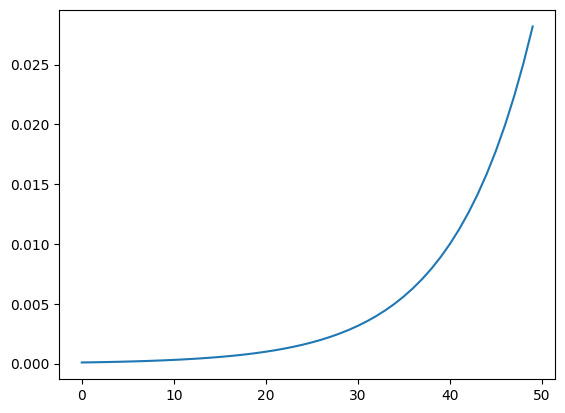

In [ ]:
plt.plot(lr)

In [ ]:
1e-4

0.0001

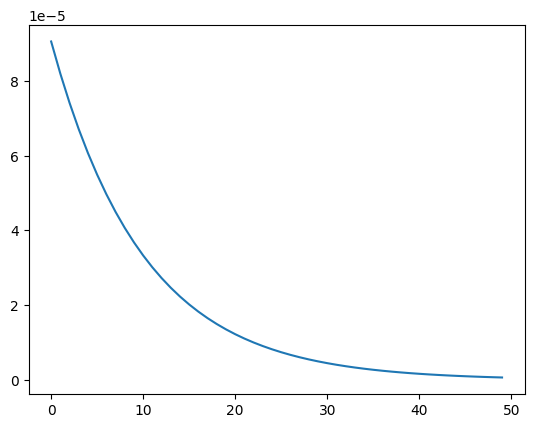

In [ ]:
lr = []
initial_lr = 0.0001
for epoch in range(0,50):
  initial_lr = initial_lr * tf.math.exp(-0.1)
  lr.append(initial_lr)

plt.plot(lr)

In [ ]:
0.001 * tf.math.exp(-0.1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.00090483745>

In [ ]:
def scheduler(epoch, lr):

  return 1e-4 * 10**(epoch/50)
  # if epoch < 20:
  #   return 0.1
  # elif epoch < 60:
  #   return 0.001
  # else:
  #   return 0.0001
    # return lr * tf.math.exp(-0.1)

# Set random seed
# tf.random.set_seed(42)
set_seed(3)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), #with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=150,
                      callbacks=[lr_scheduler])

Random seed set as 3
Epoch 1/150
22/22 [==============================] - 2s 2ms/step - loss: 0.7031 - accuracy: 0.4971 - lr: 1.0000e-04
Epoch 2/150
22/22 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.5000 - lr: 1.0471e-04
Epoch 3/150
22/22 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.5029 - lr: 1.0965e-04
Epoch 4/150
22/22 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5029 - lr: 1.1482e-04
Epoch 5/150
22/22 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.5043 - lr: 1.2023e-04
Epoch 6/150
22/22 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.5043 - lr: 1.2589e-04
Epoch 7/150
22/22 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.5071 - lr: 1.3183e-04
Epoch 8/150
22/22 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5071 - lr: 1.3804e-04
Epoch 9/150
22/22 [==============================] 

Now our model has finished training, let's have a look at the training history.

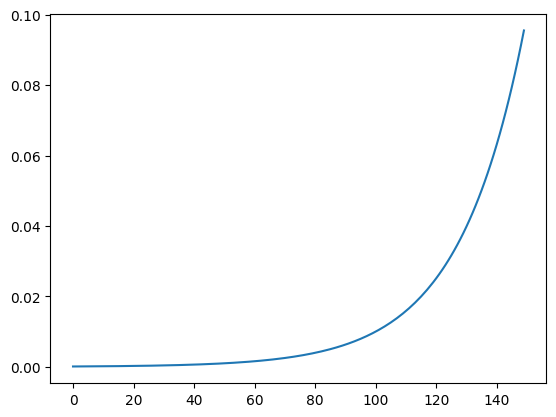

In [ ]:
plt.plot(pd.DataFrame(history.history)["lr"])

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

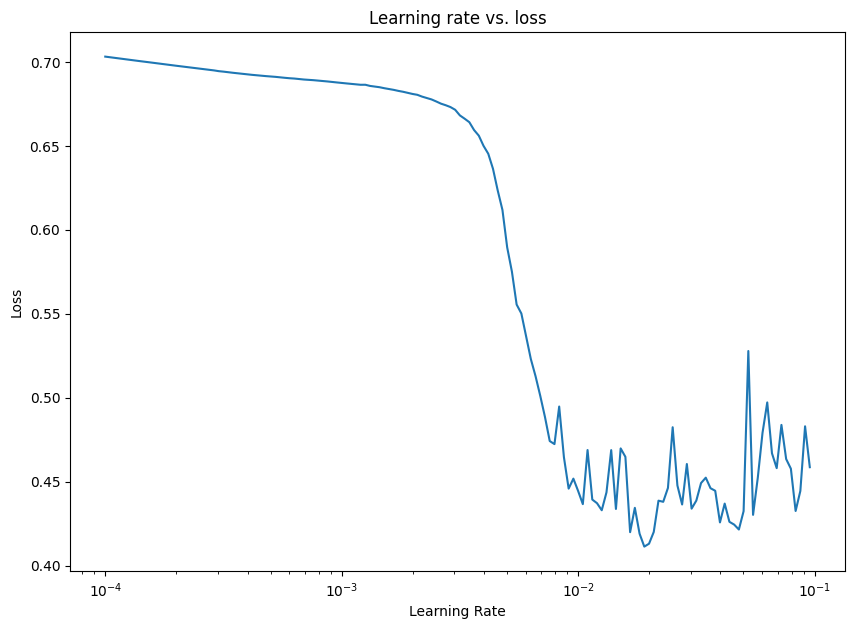

In [ ]:
# Plot the learning rate versus the loss
lrs = history.history["lr"]
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Now we've estimated the ideal learning rate (we'll use `0.02`) for our model, let's refit it.

In [ ]:
# Set the random seed
# tf.random.set_seed(42)
set_seed(3)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.04), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=100)

Random seed set as 3
Epoch 1/100
22/22 [==============================] - 1s 4ms/step - loss: 0.7018 - accuracy: 0.5086
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5129
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5100
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5057
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5114
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5129
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5143
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5114
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5100
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6907 - accur

Nice! With a little higher learning rate (`0.02` instead of `0.01`) we reach a higher accuracy than `model_8` in less epochs (`20` instead of `25`).

> 🛠 **Practice:** Now you've seen an example of what can happen when you change the learning rate, try changing the learning rate value in the [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.03154&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&problem_hide=true) and see what happens. What happens if you increase it? What happens if you decrease it?



In [ ]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]



Let's see how the predictions look.

doing binary classifcation...
doing binary classifcation...


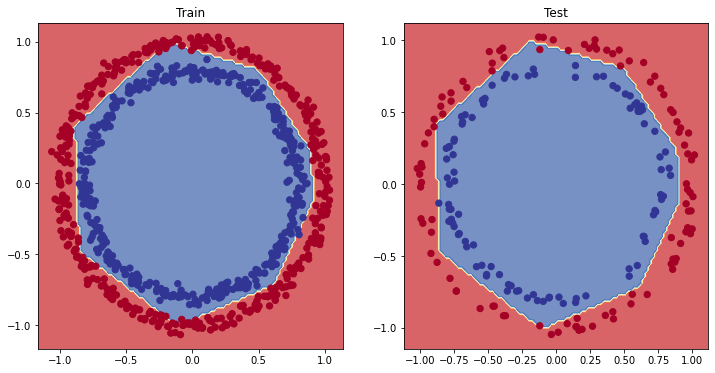

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

And as we can see, almost perfect again.

These are the kind of experiments you'll be running often when building your own models.

Start with default settings and see how they perform on your data.

And if they don't perform as well as you'd like, improve them.

Let's look at a few more ways to evaluate our classification models.

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

5/5 [==============================] - 0s 4ms/step - loss: 0.5985 - accuracy: 0.7733
Model loss on test set: 0.5984691977500916
Model accuracy on test set: 77.33%


How about a confusion matrix?

![anatomy of a confusion matrix](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-anatomy-of-a-confusion-matrix.png)
*Anatomy of a confusion matrix (what we're going to be creating). Correct predictions appear down the diagonal (from top left to bottom right).*

We can make a confusion matrix using [Scikit-Learn's `confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) method.

In [ ]:
y_pred = model_10.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_test, y_pred

In [ ]:
y_pred = y_pred.flatten()

In [ ]:
y_pred = np.where(y_pred>=0.50, 1,0)

In [ ]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        76
           1       0.78      0.76      0.77        74

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



In [ ]:
recall_score(y_test, y_pred)

0.7567567567567568

In [ ]:
precision_score(y_test, y_pred)

0.7777777777777778

In [ ]:
f1_score(y_test, y_pred)

0.7671232876712328

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
# y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_pred)

array([[60, 16],
       [18, 56]])

Ahh, it seems our predictions aren't in the format they need to be.

Let's check them out.

In [ ]:
# View the first 10 predictions
y_preds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

What about our test labels?

In [ ]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (`9.8526537e-01`), they're in a form called **prediction probabilities**.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how *likely* they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (`y_test`) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using [`tf.round()`](https://www.tensorflow.org/api_docs/python/tf/math/round).

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

Wonderful! Now we can use the `confusion_matrix` function.

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

Alright, we can see the highest numbers are down the diagonal (from top left to bottom right) so this a good sign, but the rest of the matrix doesn't really tell us much.

How about we make a function to make our confusion matrix a little more visual?

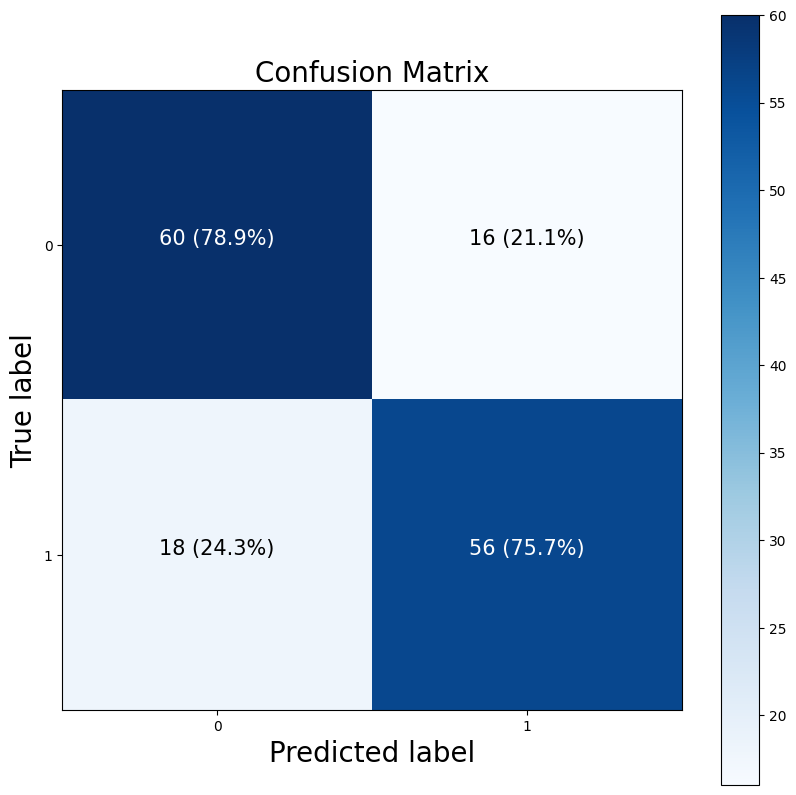

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

That looks much better. It seems our model has made almost perfect predictions on the test set except for two false positives (top right corner).

In [ ]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


## Working with a larger example (multiclass classification)

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as **multiclass classification**.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist). Meaning we can get started straight away.

We can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.

> 📖 **Resource:** The following multiclass classification problem has been adapted from the [TensorFlow classification guide](https://www.tensorflow.org/tutorials/keras/classification). A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Now let's check out an example.

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_labels[0]

9

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[1]}\n")
print(f"Training label: {train_labels[1]}")

Training sample:
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  

In [ ]:
pd.Series(train_labels).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [ ]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [ ]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_labels.shape

(10000,)

we get a large list of numbers, followed (the data) by a single number (the class label).

What about the shapes?

In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

But these are just numbers, let's visualize.

In [ ]:
a = [1,2,3,4]
a[0]

1

In [ ]:
train_data[0].max(), train_data[0].min()

(255, 0)

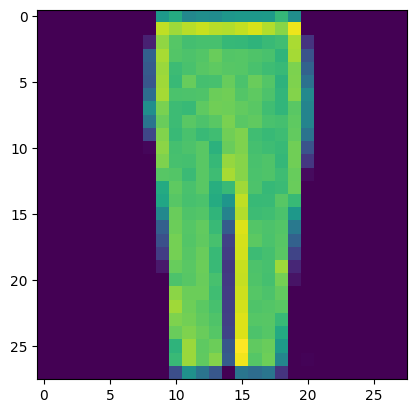

In [ ]:
plt.imshow(train_data[1225])
plt.show()

In [ ]:
# img = cv2.imread(train_data[0])
cv2_imshow(train_data[1225])

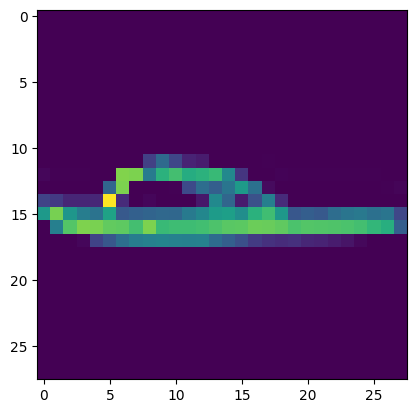

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[30])

but what about its label?

In [ ]:
# Check our samples label
train_labels[30]

5

In [ ]:
pd.Series(train_labels).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [ ]:
pd.Series(test_labels).value_counts()

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
dtype: int64

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels)).

> 🔑 **Note:** Whilst this dataset has been prepared for us and ready to go, it's important to remember many datasets won't be ready to go like this one. Often you'll have to do a few preprocessing steps to have it ready to use with a neural network (we'll see more of this when we work with our own data later).

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Now we have these, let's plot another example.

> 🤔 **Question:** Pay particular attention to what the data we're working with *looks* like. Is it only straight lines? Or does it have non-straight lines as well? Do you think if we wanted to find patterns in the photos of clothes (which are actually collections of pixels), will our model need non-linearities (non-straight lines) or not?

In [ ]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

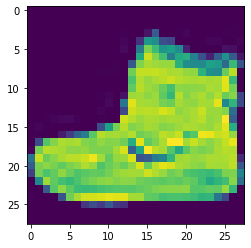

In [ ]:
plt.imshow(train_data[0])

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
len(train_labels)

60000

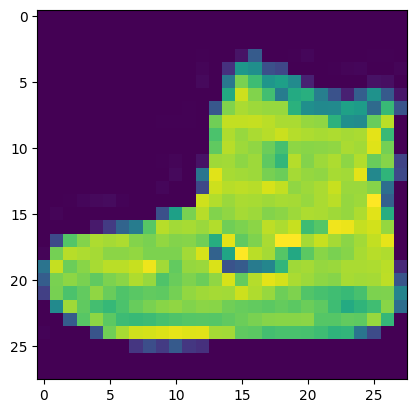

In [ ]:
plt.imshow(train_data[0])

In [ ]:
train_labels[0]

9

In [ ]:
class_names[train_labels[0]]

'Ankle boot'

In [ ]:
import matplotlib.pyplot as plt
def img_plot(index):

  plt.imshow(train_data[index])
  plt.title(class_names[train_labels[index]])
  plt.show()

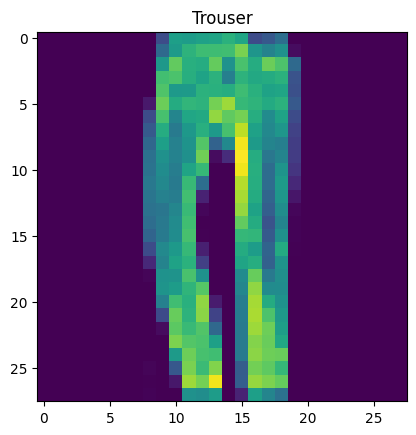

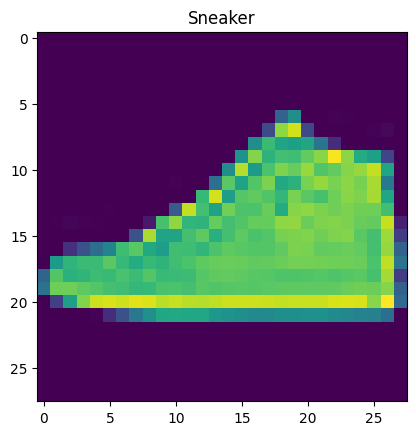

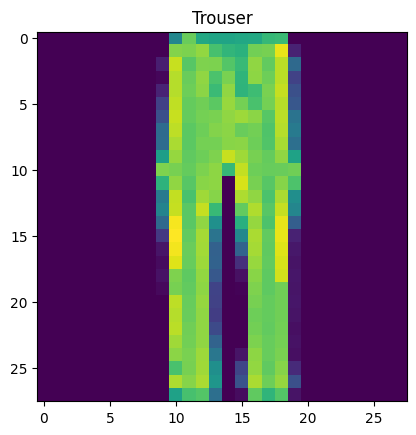

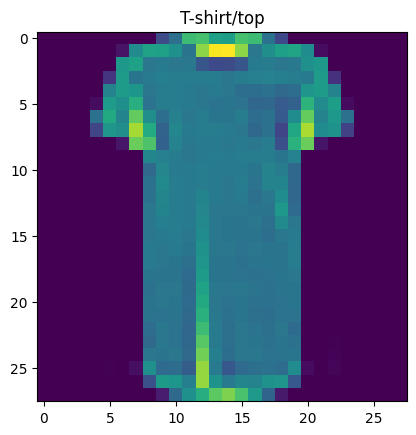

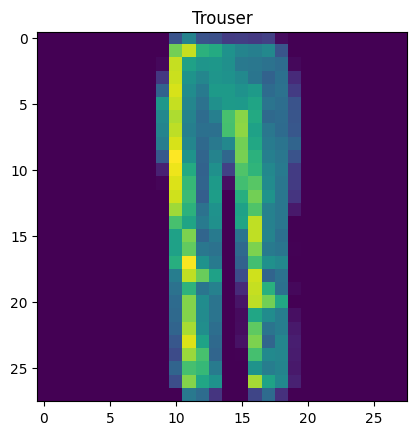

In [ ]:
for i in range(1500,1505):

  img_plot(i)

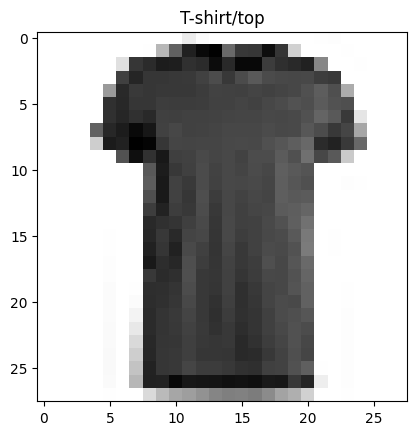

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

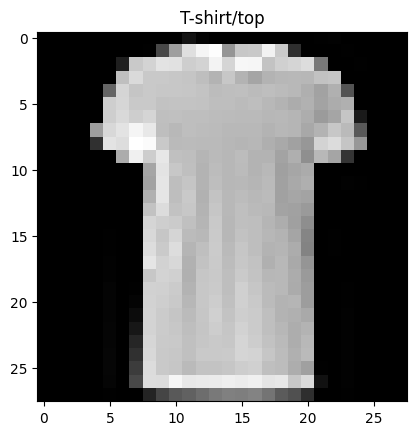

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap="gray") # change the colours to black & white
plt.title(class_names[train_labels[17]]);

In [ ]:
import random

a = [0,11,25,14, 18,2,4,6,8,9,7,3]
index = random.choice(range(len(a)))
index
# for i in range(5):

#   print(random.choice(a))

10

In [ ]:
import random
random.choice(range(len(train_data)))

14877

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

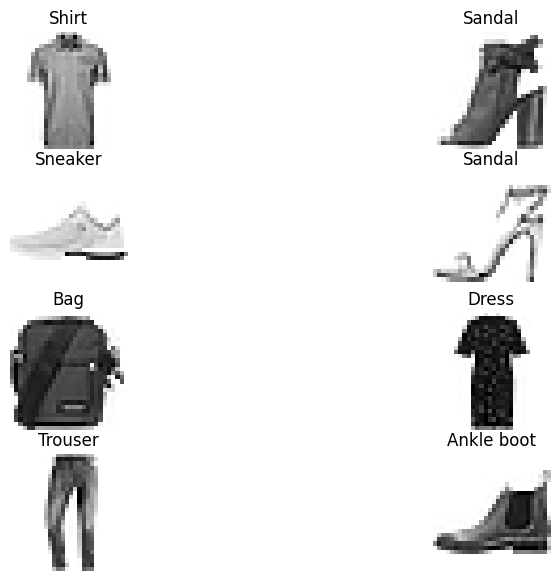

In [ ]:
# Plot multiple random images of fashion MNIST
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.figure(figsize=(10, 7))
for i in range(8):
  ax = plt.subplot(4, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

You ready? Let's go.

In [ ]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [ ]:
tf.expand_dims(train_labels,-1)

<tf.Tensor: shape=(60000, 1), dtype=uint8, numpy=
array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)>

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
train_data[0].flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
set_seed(3)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.InputLayer(input_shape = (28*28,)),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

history = model.fit(train_data, train_labels, epochs = 20, validation_data= (test_data, test_labels))


Random seed set as 3
Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0117 - accuracy: 0.6863 - val_loss: 0.6624 - val_accuracy: 0.7583
Epoch 2/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5873 - accuracy: 0.7876 - val_loss: 0.5729 - val_accuracy: 0.7986
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5162 - accuracy: 0.8151 - val_loss: 0.5756 - val_accuracy: 0.7842
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4841 - accuracy: 0.8268 - val_loss: 0.4968 - val_accuracy: 0.8234
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4566 - accuracy: 0.8335 - val_loss: 0.4956 - val_accuracy: 0.8202
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4417 - accuracy: 0.8407 - val_loss: 0.4694 - val_accuracy: 0.8316
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4272 - accuracy: 0.8478 - val_loss: 0

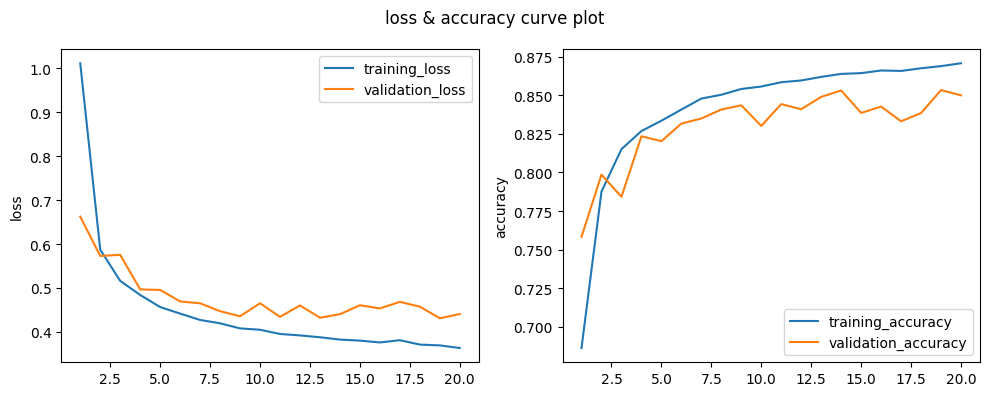

In [ ]:
import seaborn as sns
plot_curve(history)

In [ ]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.4407 - accuracy: 0.8499


[0.4406645894050598, 0.8499000072479248]

In [ ]:
test_labels.shape

(10000,)

In [ ]:
y_pred = model.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[0]

array([2.10331752e-11, 1.21714895e-11, 3.61811902e-15, 6.57648547e-10,
       9.71550063e-11, 7.38106743e-02, 2.90633555e-12, 2.05843197e-03,
       7.75945523e-07, 9.24130082e-01], dtype=float32)

In [ ]:
y_pred[0].max()

0.9241301

In [ ]:
y_pred[:5]

array([[2.10331752e-11, 1.21714895e-11, 3.61811902e-15, 6.57648547e-10,
        9.71550063e-11, 7.38106743e-02, 2.90633555e-12, 2.05843197e-03,
        7.75945523e-07, 9.24130082e-01],
       [6.30163049e-06, 2.23834218e-09, 9.97066677e-01, 1.57389763e-07,
        9.97471274e-04, 3.33189771e-27, 1.85854768e-03, 0.00000000e+00,
        7.08597581e-05, 3.10521980e-27],
       [1.64809774e-06, 9.99958575e-01, 1.16637310e-07, 3.82680919e-05,
        1.28579654e-06, 1.38511555e-22, 1.11467058e-08, 0.00000000e+00,
        5.77877746e-09, 6.67135061e-18],
       [2.28526858e-07, 9.99941409e-01, 9.17038250e-08, 5.69809163e-05,
        1.22957692e-06, 2.36347980e-18, 2.62782840e-09, 0.00000000e+00,
        4.77172390e-09, 1.17640901e-15],
       [1.54172108e-01, 4.22876212e-04, 2.50666648e-01, 2.19536517e-02,
        1.43681066e-02, 5.91427393e-11, 5.30771971e-01, 1.24591989e-25,
        2.76445001e-02, 7.62917854e-12]], dtype=float32)

In [ ]:
np.argmax(y_pred[:5], axis = -1)

array([9, 2, 1, 1, 6])

In [ ]:
y = np.argmax(y_pred, axis = -1)

In [ ]:
test_labels[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
y[:5]

array([9, 2, 1, 1, 6])

In [ ]:
y_test = []
y_pred_name = []

for i in test_labels:
  y_test.append(class_names[i])

for j in y:
  y_pred_name.append(class_names[j])


In [ ]:
y_test[:5]

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']

In [ ]:
y_pred_name[:5]

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_name))

              precision    recall  f1-score   support

  Ankle boot       0.93      0.95      0.94      1000
         Bag       0.97      0.95      0.96      1000
        Coat       0.80      0.67      0.73      1000
       Dress       0.82      0.89      0.85      1000
    Pullover       0.69      0.83      0.75      1000
      Sandal       0.90      0.96      0.93      1000
       Shirt       0.67      0.55      0.60      1000
     Sneaker       0.96      0.90      0.92      1000
 T-shirt/top       0.78      0.85      0.82      1000
     Trouser       0.98      0.95      0.97      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
from sklearn.metrics import confusion_matrix
# pd.set_option('float_format', '{:f}'.format)

def confusion(y_test, y_pred):

  plt.figure(figsize=(10,6))
  cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index = class_names, columns= class_names)
  # print(cm_df.head())
  sns.heatmap(data = cm_df, annot = True, fmt='g')
  plt.tight_layout()
  plt.show()


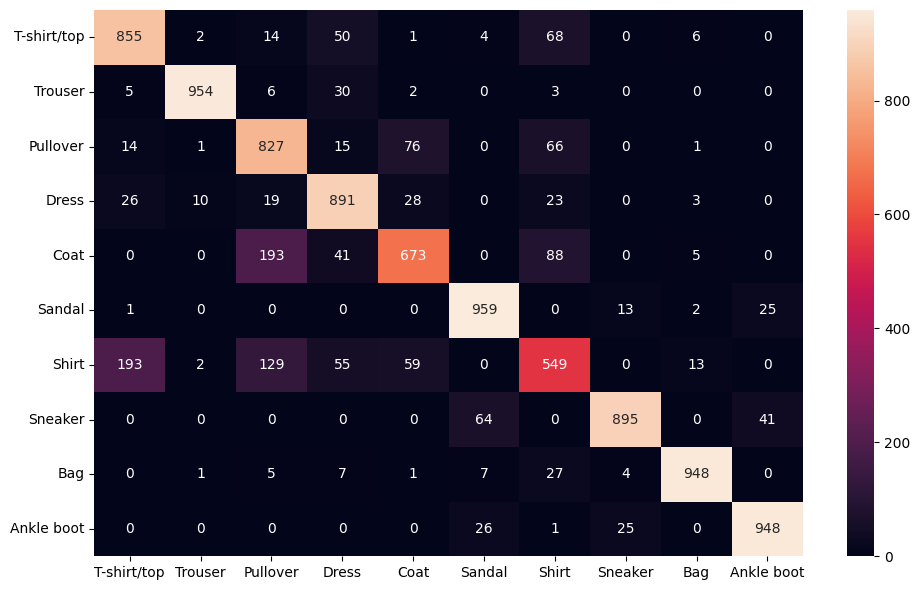

In [ ]:
confusion(test_labels, y)

In [ ]:
train_scale = train_data / 255.0
test_scale = test_data / 255.0

In [ ]:
set_seed(3)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.InputLayer(input_shape = (28*28,)),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

history = model.fit(train_scale, train_labels, epochs = 20, validation_data= (test_scale, test_labels))


Random seed set as 3
Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6259 - accuracy: 0.7785 - val_loss: 0.4791 - val_accuracy: 0.8312
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4355 - accuracy: 0.8451 - val_loss: 0.4349 - val_accuracy: 0.8458
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3994 - accuracy: 0.8566 - val_loss: 0.4291 - val_accuracy: 0.8422
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3779 - accuracy: 0.8632 - val_loss: 0.4019 - val_accuracy: 0.8592
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3626 - accuracy: 0.8687 - val_loss: 0.4199 - val_accuracy: 0.8490
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3500 - accuracy: 0.8735 - val_loss: 0.3954 - val_accuracy: 0.8569
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3397 - accuracy: 0.8765 - val_loss: 0

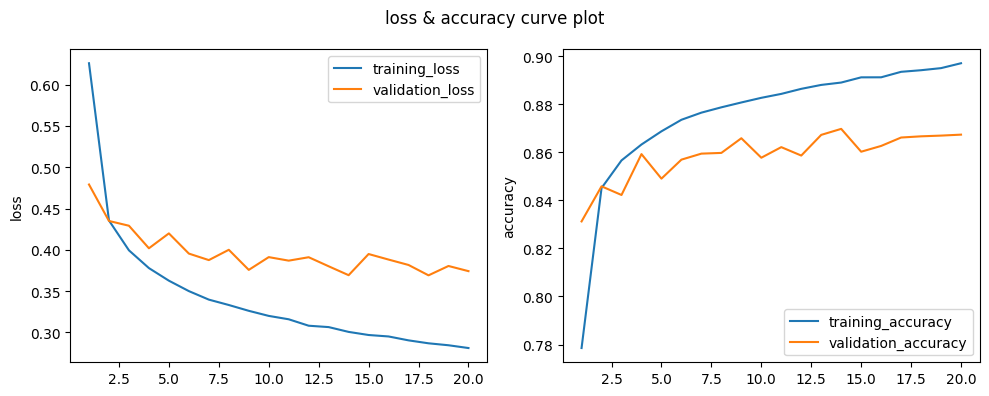

In [ ]:
plot_curve(history)

In [ ]:
ypred = model.predict(test_scale)

313/313 [==============================] - 2s 4ms/step


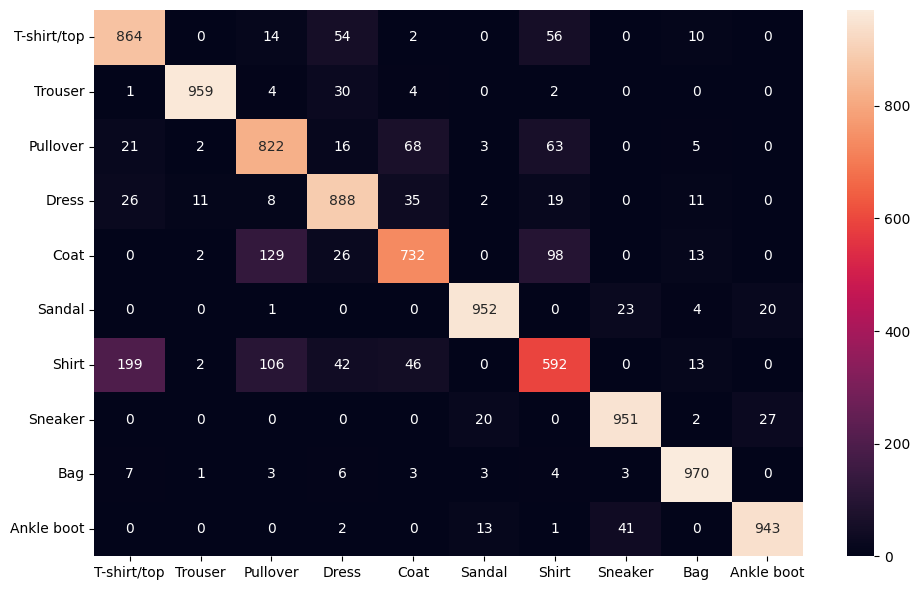

In [ ]:
y = np.argmax(ypred, axis = -1)
confusion(test_labels, y)

In [ ]:
tf.random.set_seed(42)

# model build

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.InputLayer(input_shape = [28*28]),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")

])

# model compile
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ["accuracy"]
)

# model fit

history = model.fit(train_data, train_labels,
          validation_data = (test_data, test_labels), epochs = 30)




Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.0838 - accuracy: 0.7319 - val_loss: 0.6961 - val_accuracy: 0.7662
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6619 - accuracy: 0.7846 - val_loss: 0.7754 - val_accuracy: 0.7835
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5906 - accuracy: 0.8066 - val_loss: 0.5918 - val_accuracy: 0.7879
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5371 - accuracy: 0.8162 - val_loss: 0.5731 - val_accuracy: 0.8067
Epoch 5/30
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4955 - accuracy: 0.8312 - val_loss: 0.6267 - val_accuracy: 0.8084
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4614 - accuracy: 0.8396 - val_loss: 0.4988 - val_accuracy: 0.8352
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4372 - accuracy: 0.8468 - val_loss: 0.4396 - val_accura

In [ ]:
import pandas as pd
pd.DataFrame(history.history)

In [ ]:
def plot_curve(history):
  sns.set_style("whitegrid")
  history_df = pd.DataFrame(history.history)

  fig, ax = plt.subplots(1,2, figsize = (10,4))

  sns.lineplot(data = history_df,x = history_df.index+1, y = "loss", label = "training_loss", ax = ax[0])
  sns.lineplot(data = history_df,x = history_df.index+1, y = "val_loss", label = "validation_loss",ax = ax[0])


  sns.lineplot(data = history_df,x = history_df.index+1, y = "accuracy", label = "training_accuracy", ax = ax[1])
  sns.lineplot(data = history_df,x = history_df.index+1, y = "val_accuracy", label = "validation_accuracy", ax = ax[1])

  fig.suptitle("loss & accuracy curve plot")
  plt.tight_layout()
  plt.show()

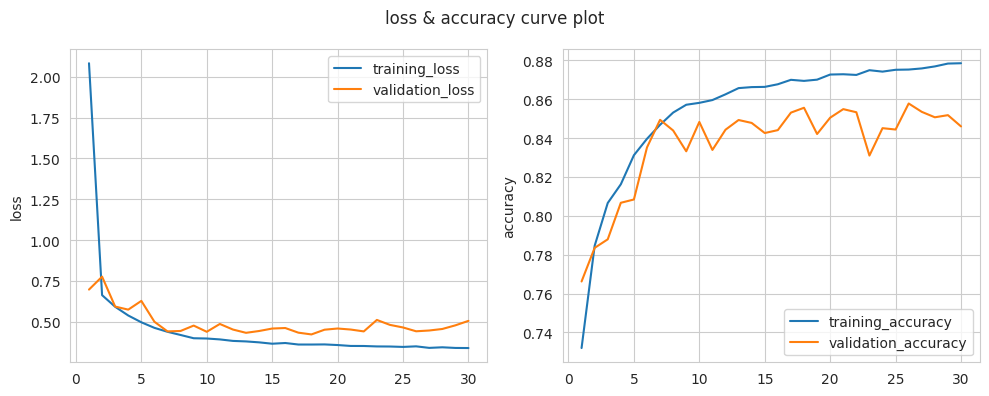

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_curve(history)

In [ ]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5042 - accuracy: 0.8460


[0.5042384266853333, 0.8460000157356262]

In [ ]:
y_pred = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[0:2]

array([[7.1961262e-25, 5.4652082e-21, 3.8233859e-29, 2.0763998e-30,
        1.5129024e-32, 1.0261823e-04, 4.1184035e-22, 4.3984808e-04,
        1.1219133e-14, 9.9945748e-01],
       [3.1391301e-05, 8.2168833e-10, 8.8051343e-01, 1.4423199e-05,
        6.6897988e-02, 2.6179114e-10, 5.0854370e-02, 5.8814444e-21,
        1.6884877e-03, 1.2179198e-37]], dtype=float32)

In [ ]:
y_pred_le = np.argmax(y_pred, axis = 1)

In [ ]:
y_pred_le.shape, test_labels.shape

((10000,), (10000,))

In [ ]:
from sklearn.metrics import confusion_matrix
# pd.set_option('float_format', '{:f}'.format)

def confusion(y_test, y_pred):

  plt.figure(figsize=(10,6))
  cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index = class_names, columns= class_names)
  # print(cm_df.head())
  sns.heatmap(data = cm_df, annot = True, fmt='g')
  plt.tight_layout()
  plt.show()


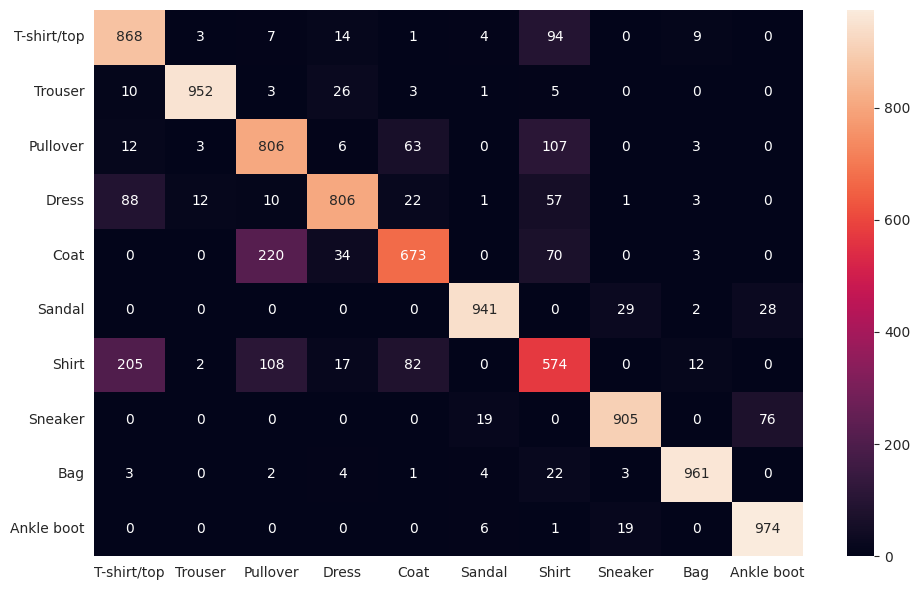

In [ ]:
confusion(test_labels, y_pred_le)

In [ ]:
y_test = [0,0,1,0,1]
y_pred = [0,1,0,0,1]

for i in range(len(y_test)):
  # print(i)
  if (y_pred[i] == 0) & (y_test[i] == 1):
    print(i)

2


In [ ]:
index = []
for i in range(len(y_pred_le)):
  # print(i)
  if (y_pred_le[i] == 6) & ((test_labels[i] == 0) | (test_labels[i] ==2)):
    index.append(i)

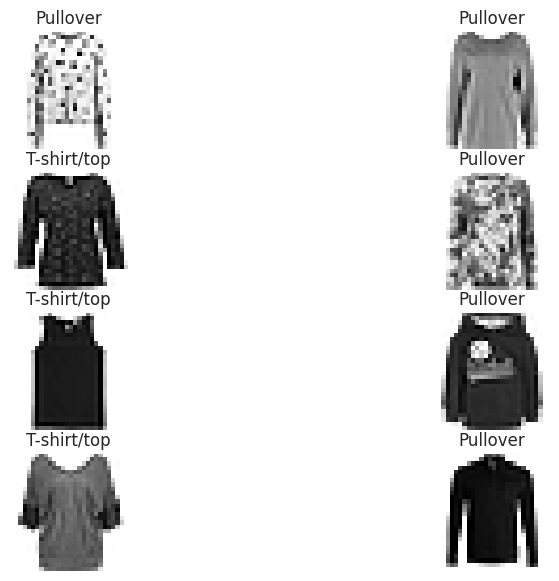

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10, 7))
for i in range(8):
  ax = plt.subplot(4, 2, i + 1)
  rand_index = random.choice(index)
  plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[test_labels[rand_index]])
  plt.axis(False)

In [ ]:
# testing effect of scaling on model
train_data_scale = train_data / 255.0
test_data_scale = test_data / 255.0

tf.random.set_seed(42)

# model build

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.InputLayer(input_shape = [28*28]),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")

])

# model compile
model2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ["accuracy"]
)

# model fit

history2 = model2.fit(train_data_scale, train_labels,
          validation_data = (test_data_scale, test_labels), epochs = 9)





Epoch 1/9
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4972 - accuracy: 0.8226 - val_loss: 0.4093 - val_accuracy: 0.8496
Epoch 2/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3661 - accuracy: 0.8655 - val_loss: 0.4412 - val_accuracy: 0.8500
Epoch 3/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3304 - accuracy: 0.8774 - val_loss: 0.3772 - val_accuracy: 0.8599
Epoch 4/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3084 - accuracy: 0.8866 - val_loss: 0.3669 - val_accuracy: 0.8668
Epoch 5/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2905 - accuracy: 0.8921 - val_loss: 0.3601 - val_accuracy: 0.8687
Epoch 6/9
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2750 - accuracy: 0.8967 - val_loss: 0.3626 - val_accuracy: 0.8666
Epoch 7/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2644 - accuracy: 0.9023 - val_loss: 0.3476 - val_accuracy: 0.874

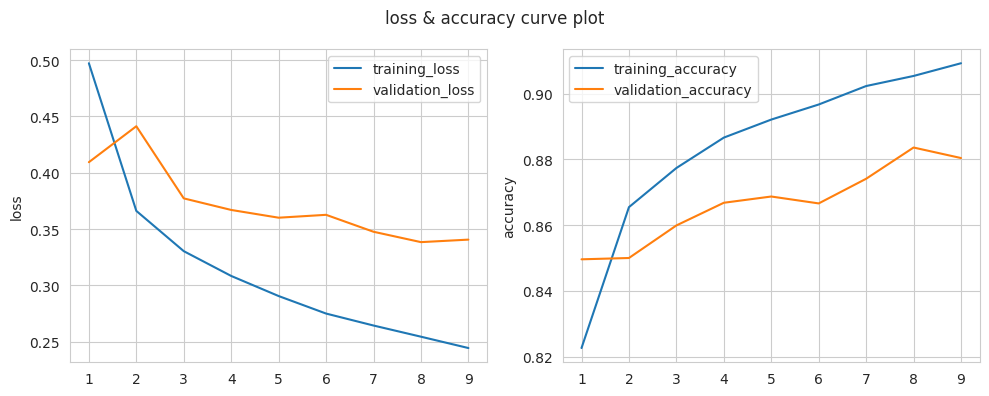

In [ ]:
plot_curve(history2)

In [ ]:
y_pred_2 = model2.predict(test_data)
y_pred_2.shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

In [ ]:
y_pred_2_le = np.argmax(y_pred_2, axis = 1)
y_pred_2_le.shape

(10000,)

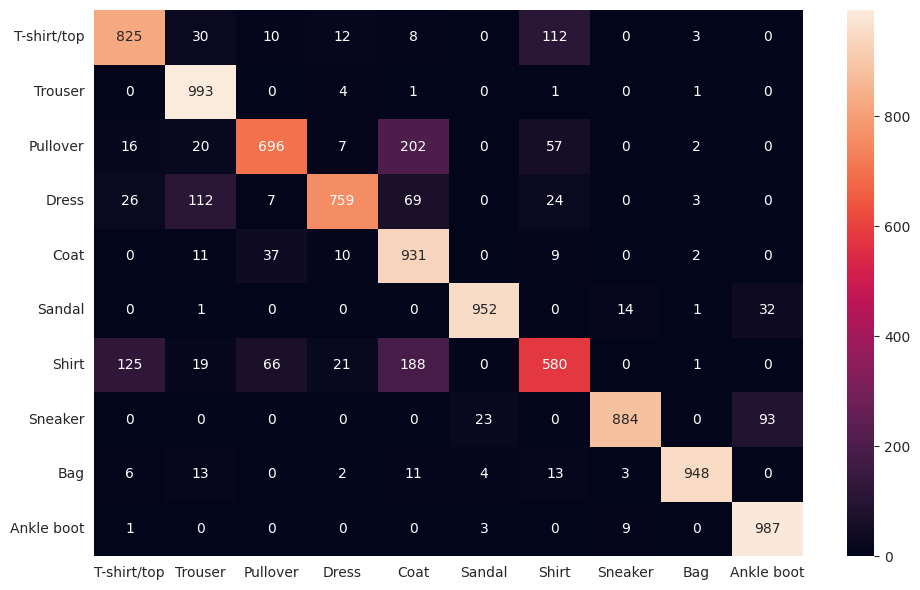

In [ ]:
confusion(test_labels, y_pred_2_le)

In [ ]:
y_pred_le[:5]

array([9, 2, 1, 1, 6])

In [ ]:
test_labels[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
y_pred[0].argmax()

9

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 100)               78500     
                                                                 
 dense_36 (Dense)            (None, 100)               10100     
                                                                 
 dense_37 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 50)                5050      
                                                                 
 dense_25 (Dense)            (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# compile model

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

# # fit model

# history = model_1.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

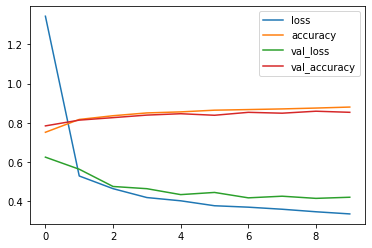

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
tf.reshape(train_data[0], [784]).shape

TensorShape([784])

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________


Alright, our model gets to about ~35% accuracy after 10 epochs using a similar style model to what we used on our binary classification problem.

Which is better than guessing (guessing with 10 classes would result in about 10% accuracy) but we can do better.

Do you remember when we talked about neural networks preferring numbers between 0 and 1? (if not, treat this as a reminder)

Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the `non_norm_history` variable when calling `fit()`). It's pixel values are between 0 and 255.

Let's see.

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: `255.0` (dividing by a float also converts to a float).


Doing so will result in all of our data being between 0 and 1 (known as **scaling** or **normalization**).

In [ ]:
train_data[0]

In [ ]:
train_data[0]/255.0

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Beautiful! Now our data is between 0 and 1. Let's see what happens when we model it.

We'll use the same model as before (`model_11`) except this time the data will be normalized.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

Let's plot each model's history (their loss curves).

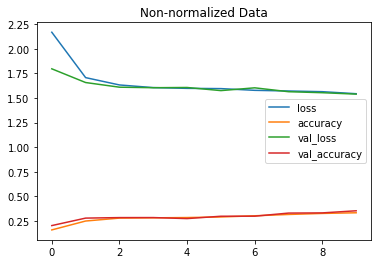

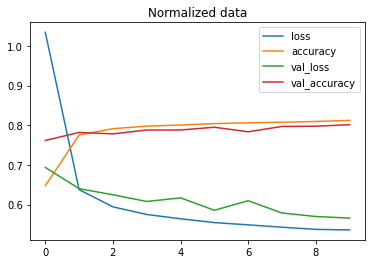

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

From these two plots, we can see how much quicker our model with the normalized data (`model_12`) improved than the model with the non-normalized data (`model_11`).

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

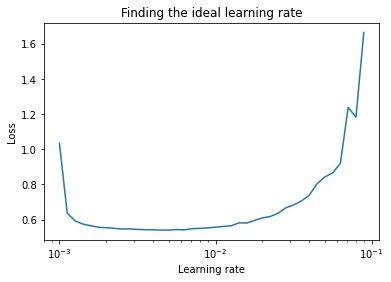

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) (`0.001`) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:
* Evaluate its performance using other classification metrics (such as a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) or [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

Since a confusion matrix compares the truth labels (`test_labels`) to the predicted labels, we have to make some predictions with our model.

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
        5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01],
       [3.4278653e-06, 1.2899314e-16, 9.5989150e-01, 2.0516393e-07,
        1.5329231e-02, 2.4532665e-13, 2.4142833e-02, 1.1383622e-28,
        6.3272531e-04, 4.4789129e-08],
       [6.1062819e-05, 9.9657661e-01, 4.3866635e-08, 3.3405751e-03,
        1.3249395e-05, 1.4383214e-21, 8.2790129e-06, 7.3236611e-18,
        5.4811181e-08, 4.9224761e-14],
       [7.5031356e-05, 9.9053681e-01, 4.2528447e-07, 9.2231641e-03,
        1.3623103e-04, 1.8276367e-18, 2.6808189e-05, 4.8124370e-14,
        1.4521520e-06, 2.2211375e-11],
       [7.2189979e-02, 1.5495764e-06, 2.5566906e-01, 1.0363132e-02,
        4.3541368e-02, 1.1069343e-13, 6.1693007e-01, 6.7543116e-23,
        1.3049184e-03, 1.2140288e-09]], dtype=float32)

Our model outputs a list of **prediction probabilities**, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) method.

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
y_probs[0]

array([8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
       5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
       4.0605268e-03, 8.0787349e-01], dtype=float32)

In [ ]:
# find the max value index
y_probs[0].argmax()

9

In [ ]:
# find the max value in tensor
tf.reduce_max(y_probs[0]).numpy() * 100

80.78734874725342

Now let's do the same for all of the predictions.

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Wonderful, now we've got our model's predictions in label form, let's create a confusion matrix to view them against the truth labels.

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

That confusion matrix is hard to comprehend, let's make it prettier using the function we created before.

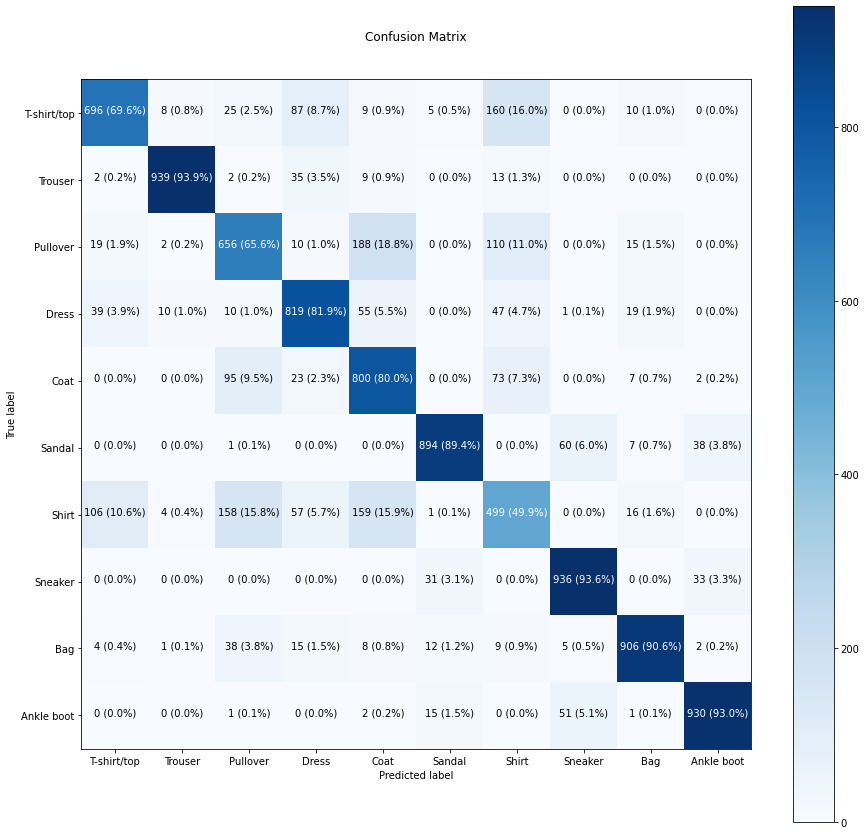

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

That looks much better!

Except the results aren't as good as they could be...

It looks like our model is getting confused between the `Shirt` and `T-shirt/top` classes (e.g. predicting `Shirt` when it's actually a `T-shirt/top`).

> 🤔 **Question:** Does it make sense that our model is getting confused between the `Shirt` and `T-shirt/top` classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

In [ ]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 43ms/step


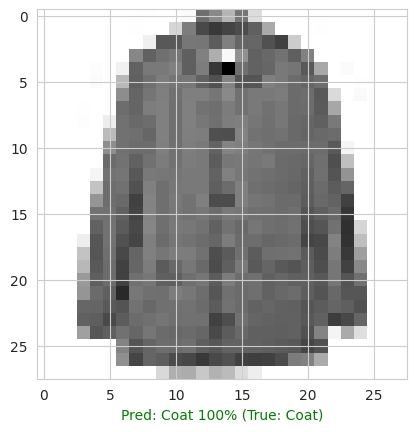

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model2,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

After running the cell above a few times you'll start to get a visual understanding of the relationship between the model's predictions and the true labels.

Did you figure out which predictions the model gets confused on?

It seems to mix up classes which are similar, for example, `Sneaker` with `Ankle boot`.

Looking at the images, you can see how this might be the case.

The overall shape of a `Sneaker` and an `Ankle Boot` are similar.

The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up.

### What patterns is our model learning?

We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (`model_14`) using the `layers` attribute.

In [ ]:
# Find the layers of our most recent model
model_14.layers

We can access a target layer using indexing.

In [ ]:
# Extract a particular layer
model_14.layers[1]

And we can find the patterns learned by a particular layer using the `get_weights()` method.

The `get_weights()` method returns the **weights** (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.71502626, -0.06077098, -0.9976306 , -1.0484313 ],
        [ 0.2773213 , -0.47155428, -0.5291645 ,  0.0232926 ],
        [ 0.7752429 ,  0.5402763 , -1.128857  , -0.7426155 ],
        ...,
        [-0.3945344 ,  0.476287  , -0.22641571,  0.25505948],
        [-0.40515783,  0.618101  ,  0.23928401, -0.5038762 ],
        [ 0.23884569,  0.11606903, -0.12131351,  0.04352415]],
       dtype=float32), (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the [`kernel_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) when creating a layer, the default is [`"glorot_uniform"`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform)) and are then updated to better representative values of the data (non-random) by the neural network during training.

*Example workflow of how a supervised neural network starts with random weights and updates them to better represent the data by looking at examples of ideal outputs.*

Now let's check out the bias vector.

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the [`bias_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to *every* layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

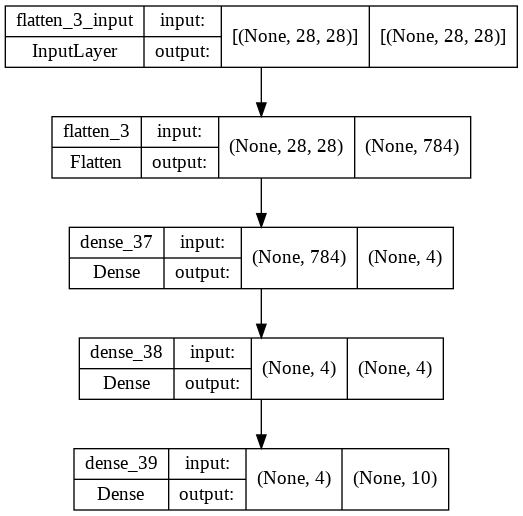

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

## How a model learns (in brief)

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the `fit()` fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called [**backpropagation**](https://en.wikipedia.org/wiki/Backpropagation).

In other words, data and labels pass through a model (**forward pass**) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (**backward pass**) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.

## Extra curriculum 📖
* Watch 3Blue1Brown's neural networks video 2: [*Gradient descent, how neural networks learn*](https://www.youtube.com/watch?v=IHZwWFHWa-w). After you're done, write 100 words about what you've learned.
  * If you haven't already, watch video 1: [*But what is a Neural Network?*](https://youtu.be/aircAruvnKk). Note the activation function they talk about at the end.
* Watch [MIT's introduction to deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) (if you haven't already) to get an idea of the concepts behind using linear and non-linear functions.
* Spend 1-hour reading [Michael Nielsen's Neural Networks and Deep Learning book](http://neuralnetworksanddeeplearning.com/index.html).
* Read the [ML-Glossary documentation on activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html). Which one is your favourite?
  * After you've read the ML-Glossary, see which activation functions are available in TensorFlow by searching "tensorflow activation functions".